<a href="https://colab.research.google.com/github/manishmeshram51/cat_vs_dog/blob/master/cat_vs_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Cat Vs dog classifier usig keras **

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 
import cv2
import matplotlib.image as mpimg


In [2]:
#mount gdrive to load data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#unzipping the data 

!unzip -uq "/content/drive/My Drive/dog vs cat.zip"

shape of image: (396, 312, 3)


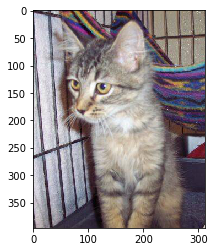

In [43]:
#printing the image 

img = mpimg.imread("dog vs cat/training_set/cat.2.jpg")
plt.imshow(img)
print("shape of image:",img.shape)


In [0]:
import glob

x_train = []
y_train = []

x_test = []
y_test = []

labels = ["cat",
          "dog"
         ]

#for training data 
files_train = glob.glob ("dog vs cat/training_set/*.jpg") # your image path

for myFile in files_train:
    img = plt.imread(myFile)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # resizing the image to (100,100)
    resized_image = cv2.resize(img_gray, (100, 100))      

    x_train.append(resized_image)
    
    label = str(myFile)[24:24+3]
    y_train.append(labels.index(label))

x_train = np.array(x_train,dtype='float32') / 255 #as mnist
y_train = np.array(y_train,dtype='object') #as mnist

#for testing data
files_test = glob.glob ("dog vs cat/test_set/*.jpg") # your image path

for myFile in files_test:
    img = plt.imread(myFile)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # resizing the image to (100,100)
    resized_image = cv2.resize(img_gray, (100, 100))      

    x_test.append(resized_image)
    
    label = str(myFile)[20:20+3]
    y_test.append(labels.index(label))

x_test = np.array(x_test,dtype='float32') /255 #as mnist
y_test = np.array(y_test,dtype='object') #as mnist



len of training data: 8000
shape of the image : (8000, 100, 100)
len of training label: 8000
image type: <class 'numpy.ndarray'>
label type <class 'numpy.ndarray'>
image namex: cat


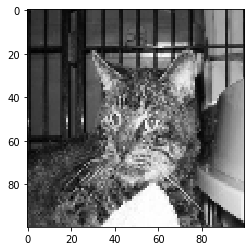

len of training data: 2000
shape of the image : (2000, 100, 100)
len of training label: 2000
image type: <class 'numpy.ndarray'>
label type <class 'numpy.ndarray'>
image namex: dog


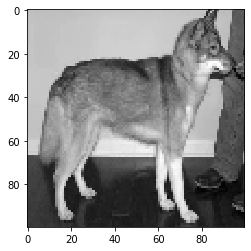

In [100]:
#cheking the data
#training data 
print("len of training data:",len(x_train))
print("shape of the image :",x_train.shape)
print("len of training label:",len(y_train))
print("image type:",type(x_train))
print("label type",type(y_train))

print("image namex:",labels[y_train[155]])
plt.imshow(x_train[155],cmap = 'gray')
plt.show()

#testing data
print("len of training data:",len(x_test))
print("shape of the image :",x_test.shape)
print("len of training label:",len(y_test))
print("image type:",type(x_test))
print("label type",type(y_test))

print("image namex:",labels[y_test[155]])

plt.imshow(x_test[155],cmap = 'gray')
plt.show()

In [101]:
# Further break training data into train / validation sets (# put 500 into validation set and keep remaining 7500 for train)
(x_train, x_valid) = x_train[500:], x_train[500:] 
(y_train, y_valid) = y_train[500:], y_train[500:]

# Reshape input data from (100,100) to (100,100, 1)
w, h = 100,100
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 2)
y_valid = tf.keras.utils.to_categorical(y_valid, 2)
y_test = tf.keras.utils.to_categorical(y_test, 2)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (7500, 100, 100, 1) y_train shape: (7500, 2)
7500 train set
7500 validation set
2000 test set


In [102]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(100,100,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 100, 100, 64)      320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 32)        8224      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 25, 25, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 20000)            

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [104]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=5,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 7500 samples, validate on 7500 samples
Epoch 1/5
7488/7500 [============================>.] - ETA: 0s - loss: 0.7243 - acc: 0.5467
Epoch 00001: val_loss improved from inf to 0.67452, saving model to model.weights.best.hdf5
7500/7500 [==============================] - 145s 19ms/sample - loss: 0.7241 - acc: 0.5473 - val_loss: 0.6745 - val_acc: 0.5929
Epoch 2/5
7488/7500 [============================>.] - ETA: 0s - loss: 0.6572 - acc: 0.6060
Epoch 00002: val_loss improved from 0.67452 to 0.62967, saving model to model.weights.best.hdf5
7500/7500 [==============================] - 148s 20ms/sample - loss: 0.6571 - acc: 0.6063 - val_loss: 0.6297 - val_acc: 0.6529
Epoch 3/5
7488/7500 [============================>.] - ETA: 0s - loss: 0.6196 - acc: 0.6501
Epoch 00003: val_loss improved from 0.62967 to 0.59489, saving model to model.weights.best.hdf5
7500/7500 [==============================] - 152s 20ms/sample - loss: 0.6196 - acc: 0.6501 - val_loss: 0.5949 - val_acc: 0.6956
Epoch 4/

In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')


In [106]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7055


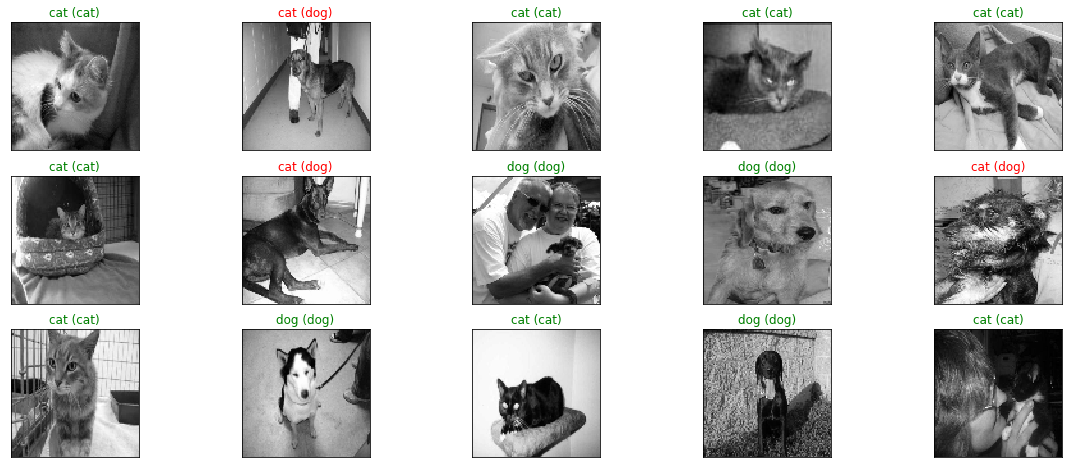

In [108]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]),cmap='gray')
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))